In [1]:
import montecarlo

# Create configuration
spins = montecarlo.SpinConfiguration()
spins.initialize([0,1,1,1,0,1])

# Create hamiltonian with desired values of mu, J and the periodic boundary conditions flag
ham = montecarlo.Hamiltonian()
ham.initialize(-2,1.1,True)

# Compute energy
energy = ham.compute_energy(spins)

# Compute magnetization
magnetization = spins.compute_magnetization()

print("Spin configuration:", spins)
print("Energy:", round(energy,1))
print("Magnetization:", magnetization)

Spin configuration: 0, 1, 1, 1, 0, 1.
Energy: -1.8
Magnetization: 2


In [2]:
import montecarlo
import random

# Create spin configuration object
spins = montecarlo.SpinConfiguration()

# Generate a random spin configuration based on seed value 2
random.seed(2)
spins.randomize(8)

# Get number of sites
num_sites = spins.n_sites()

# Prints output
print("Spin configuration:", spins)
print("Number of sites:", num_sites)

print("Spin at index 2:", spins[2])
spins.set_site(2,1)
print("Spin at index 2 after changing spin:", spins[2])

Spin configuration: 0, 0, 0, 1, 0, 1, 1, 0.
Number of sites: 8
Spin at index 2: 0
Spin at index 2 after changing spin: 1


Text(0.5, 1.0, 'Thermal Quantities vs. Temperature')

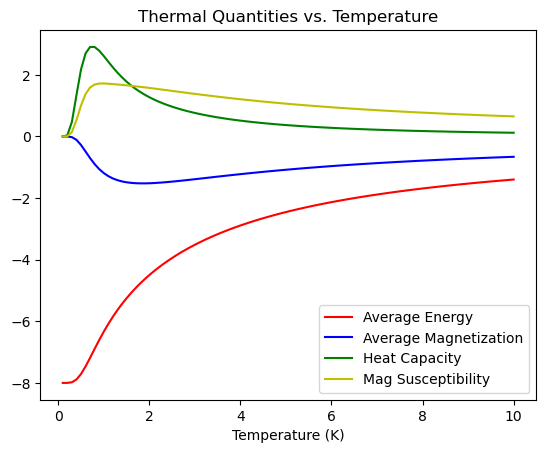

In [3]:
import montecarlo
import matplotlib.pyplot as plt

# Create spin configuration system with N = 8 spins
spin_system = montecarlo.SpinConfigurationSystem()
spin_system.initialize(8)

# Create Hamiltonian
ham = montecarlo.Hamiltonian()
ham.initialize(-1,1.01,True)

# Generate lists to be graphed
temperatures, energies, magnetizations, heat_caps, mag_suscept = ham.generate_thermal_quantities(spin_system,0.1,10,0.1)

# Creates plot
plt.plot(
 temperatures, energies, 'r-',
 temperatures, magnetizations, 'b-',
 temperatures, heat_caps, 'g-',
 temperatures, mag_suscept, 'y-'
)
plt.legend(["Average Energy", "Average Magnetization", "Heat Capacity", "Mag Susceptibility"],loc='best')
plt.xlabel("Temperature (K)")
plt.title("Thermal Quantities vs. Temperature")

In [5]:
import montecarlo
import random

# Create spin configuration
spins = montecarlo.SpinConfiguration()

# Create Hamiltonian with large negative mu value (strong external field)
ham = montecarlo.Hamiltonian()
ham.initialize(-1,-10,True)

# Creates 30 site spin configuration from seed value 2.
random.seed(2)
spins.randomize(30)
print("Spin configuration before sweep:", spins)

# Performs sweep
spins = ham.metropolis_sweep(spins,10)
print("Spin configuration after sweep:", spins)

Spin configuration before sweep: 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0.
Spin configuration after sweep: 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1.


Text(0.5, 1.0, 'Thermal Quantities vs. Temperature')

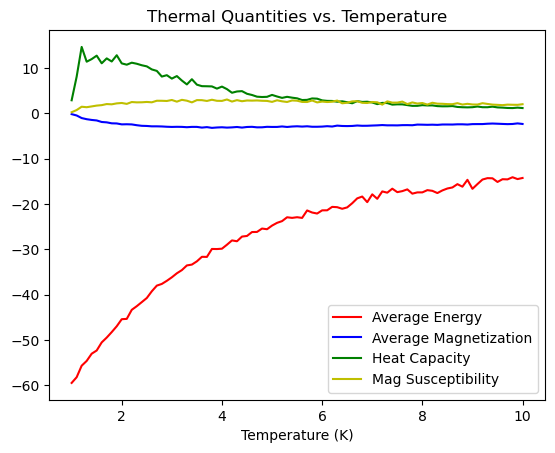

In [6]:
import montecarlo
import matplotlib.pyplot as plt

# Create Hamiltonian
ham = montecarlo.Hamiltonian()
ham.initialize(-2,1.1,True)

# Generate lists of thermal quantities. Each entry is calculated using 1000 montecarlo steps and 100 burned steps
temps, energies, magnetizations, heat_caps, mag_susceptibilities = montecarlo.generate_montecarlo_thermal_quantities(30,ham,1,10,0.1,1000,100)

# Creates plot
plt.plot(
 temps, energies, '-r',
 temps, magnetizations, '-b',
 temps, heat_caps, '-g',
 temps, mag_susceptibilities, '-y'
)
plt.legend(["Average Energy", "Average Magnetization", "Heat Capacity", "Mag Susceptibility"], loc='best')
plt.xlabel("Temperature (K)")
plt.title("Thermal Quantities vs. Temperature")